In [30]:
#the right hand side of the equality
R.<q> = PolynomialRing(QQ)
def q_tau(matroid, S, e):
    q_tau = [] 
    for F in S:
        modded_matroid = matroid.contract(F.union(e))
        if modded_matroid.rank() % 2 == 0:
            q_tau.append(0)
        else:
            q_tau.append(invKL(modded_matroid).leading_coefficient())
    return q_tau

def tau(matroid, S, e):
    tau = [] 
    for F in S:
        modded_matroid = matroid.contract(F.union(e))
        if modded_matroid.rank() % 2 == 0:
            tau.append(0)
        else:
            tau.append(modded_matroid.lattice_of_flats().kazhdan_lusztig_polynomial().leading_coefficient())
    return tau

def the_set_S(flats, e):
    return set(F for F in flats if e.isdisjoint(F) and F.union(e) in flats)

def delform_rhs(matroid, tau_func, inv_kl):
    e = matroid.flats(1)[0]
    flats = list(matroid.lattice_of_flats())
    print(flats)
    print(e)

    deletion = matroid.delete(e).simplify()
    contraction = matroid.contract(e).simplify()

    set_S = list(the_set_S(flats, e))

    print("the set S:", set_S)

    # Compute bv_tau_function and zip with set_S
    tau_values = tau_func(matroid, set_S, e)
    print("tau values:", tau_values)

    # Compute the summation over S
    sum_S = sum(
        x * q ** ((matroid.rank() - matroid.rank(y))//2) * inv_kl(matroid.delete(matroid.groundset() - y).simplify())
        for x, y in zip(tau_values, set_S)
    )

    print("sum_S:", sum_S)
    # Compute the RHS
    return inv_kl(deletion) - q * inv_kl(contraction) + sum_S

def invKL(M):
	R = PolynomialRing(QQ, 'q')
	q = R.gen(0)
	if M.rank() == 0:
		return R(1)
	L = M.lattice_of_flats()
	invKLpoly = 0
	for i in range(1,len(L)):
		Mcon = M.contract(L[i])
		Mres = M.delete(M.groundset()-L[i])
		Lres = Mres.lattice_of_flats()
		invKLpoly += (-1)^(Mres.rank())*Lres.kazhdan_lusztig_polynomial()*invKL(Mcon)
	return -invKLpoly

In [31]:
matroid = matroids.Wheel(3)

delform_rhs(matroid, tau, invKL)

[frozenset(), frozenset({2}), frozenset({3}), frozenset({2, 3}), frozenset({1}), frozenset({5}), frozenset({1, 5}), frozenset({4}), frozenset({1, 2, 4}), frozenset({3, 4, 5}), frozenset({0}), frozenset({0, 1, 3}), frozenset({0, 2, 5}), frozenset({0, 4}), frozenset({0, 1, 2, 3, 4, 5})]
frozenset({0})
the set S: [frozenset(), frozenset({4})]
tau values: [0, 1]
sum_S: q


4

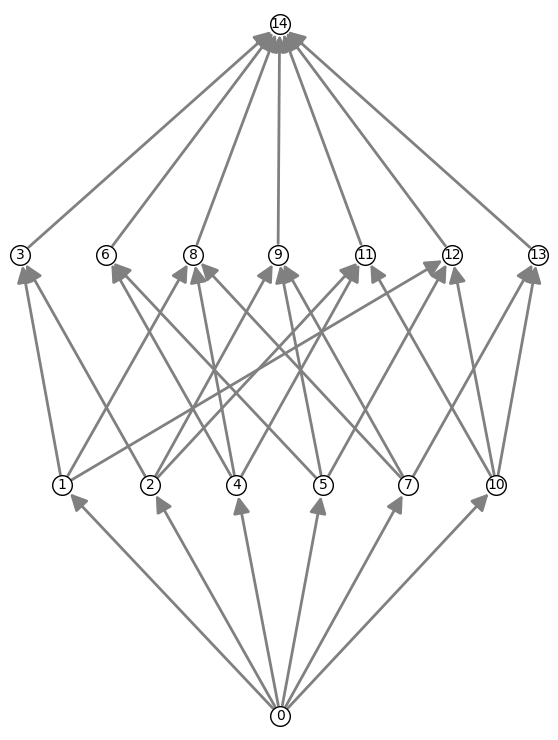

In [32]:
flats = list(matroid.lattice_of_flats())
labels = {element: idx for idx, element in enumerate(flats)}
matroid.lattice_of_flats().plot(
    element_labels = labels, element_color = "white",
    figsize= 10, cover_color = "grey")